### IMPORT ALL PACKAGES

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [101]:
#LOAD DATASET INTO WORKSHEET
cars_df = pd.read_csv('final_cars_data.csv')

In [102]:
#DISPLAY LAST 5 VALUES OF THE DATASET
cars_df.tail()

,car_name,model,Mileage,Year,Condition,Price
10204,Seat,Cordoba,279649.0,1999,Foreign Used,1275000
10205,Cadillac,Escalade,21308.0,2011,Nigerian Used,4520000
10206,Toyota,Land,48502.0,2010,Nigerian Used,9210000
10207,Mercedes-Benz,Slk350,80497.0,2005,Nigerian Used,3001250
10208,Mitsubishi,Pajero,124776.0,2012,Nigerian Used,3957500


In [103]:
df = pd.DataFrame(cars_df)

In [104]:
#SHAPE OF DATASET
df.shape

(10209, 6)

In [105]:
#DSPLAY ALL COLUMNS
df.columns

Index(['car_name', 'model', 'Mileage', 'Year', 'Condition', 'Price'], dtype='object')

In [106]:
#DISPLAY THE TOP 5 ROWS IN THE DATASET
df.head()

,car_name,model,Mileage,Year,Condition,Price
0,Lexus,LX,21204.0,2018,Foreign Used,50015000
1,Toyota,Camry,140309.0,2013,Foreign Used,5015000
2,Toyota,Venza,172709.0,2013,Foreign Used,7115000
3,Mercedes-Benz,C,114936.0,2010,Foreign Used,4815000
4,Toyota,Lexus,123938.5,2012,Foreign Used,8515000


In [107]:
#INFORMATIONS ABOUT THE DAATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10209 entries, 0 to 10208
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_name   10209 non-null  object 
 1   model      10207 non-null  object 
 2   Mileage    10209 non-null  float64
 3   Year       10209 non-null  int64  
 4   Condition  10209 non-null  object 
 5   Price      10209 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 478.7+ KB


>> FROM THE ABOVE, WE NOTICED TWO ROWS HAD MISSING MODELS SO WE CAN DROP THOSE ROWS

In [108]:
df.dropna(subset=['model'], inplace=True)

In [109]:
#INFORMATIONS ABOUT THE DAATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10207 entries, 0 to 10208
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_name   10207 non-null  object 
 1   model      10207 non-null  object 
 2   Mileage    10207 non-null  float64
 3   Year       10207 non-null  int64  
 4   Condition  10207 non-null  object 
 5   Price      10207 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 558.2+ KB


In [110]:
#CHECK THE UNIQUE CONDITIONS IN THE DATASET
df['Condition'].value_counts()

Foreign Used     6758
Nigerian Used    3181
Locally Used      244
New                24
Name: Condition, dtype: int64

In [111]:
# show distinct years 
df['Year'].value_counts()

2013    1403
2012    1206
2010     969
2008     768
2011     727
2007     717
2006     626
2009     518
2015     468
2016     429
2004     425
2005     411
2014     288
2003     264
2002     197
2017     165
2018     160
2001     120
2000     100
1999      87
1998      44
2019      29
1997      25
2020      12
1996      11
1994      10
0          9
1995       9
1990       5
1993       4
1991       1
Name: Year, dtype: int64

>> FROM THE ABOVE, WE NOTICED SOME YEARS ARE 0 AND IT IS IMPOSSIBLE TO HAVE A YEAR AS ZERO. WE WOULD BE DROPPING THESE ROWS TOO

In [114]:
df.drop(df[df['Year'] == 0].index, axis = 0, inplace = True)

In [115]:
df.head()

,car_name,model,Mileage,Year,Condition,Price
0,Lexus,LX,21204.0,2018,Foreign Used,50015000
1,Toyota,Camry,140309.0,2013,Foreign Used,5015000
2,Toyota,Venza,172709.0,2013,Foreign Used,7115000
3,Mercedes-Benz,C,114936.0,2010,Foreign Used,4815000
4,Toyota,Lexus,123938.5,2012,Foreign Used,8515000


In [116]:
df.query('Year == 0')

,car_name,model,Mileage,Year,Condition,Price


In [117]:
#df.drop(df.query('Year == 0').index, axis=0)

In [54]:
#np.sum(df.duplicated())

In [55]:
# dropping duplicate values
#df.drop_duplicates(keep=False,inplace=True)

In [130]:
#convert the locally used to nigerian used as local in this context refers to Nigeria
df['Condition'][df['Condition'] == 'Locally Used']  = 'Nigerian Used'

C:\Users\HPSPEC~1\AppData\Local\Temp/ipykernel_14424/94807579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Condition'][df['Condition'] == 'Locally Used']  = 'Nigerian Used'


In [131]:
#recount the conditions
df['Condition'].value_counts()

Foreign Used     6757
Nigerian Used    3417
New                24
Name: Condition, dtype: int64

### NUMERICAL AND CATEGORICAL DATA

In [120]:
#Assign all numerical values to variable Numerical_data
Numerical_data = df.select_dtypes(include=[np.number])

In [121]:
Numerical_data.head()

,Mileage,Year,Price
0,21204.0,2018,50015000
1,140309.0,2013,5015000
2,172709.0,2013,7115000
3,114936.0,2010,4815000
4,123938.5,2012,8515000


In [122]:
#Assign all categorical values to variable categorical_data
categorical_data = df.select_dtypes(exclude=[np.number])

In [123]:
categorical_data.head()

,car_name,model,Condition
0,Lexus,LX,Foreign Used
1,Toyota,Camry,Foreign Used
2,Toyota,Venza,Foreign Used
3,Mercedes-Benz,C,Foreign Used
4,Toyota,Lexus,Foreign Used


In [124]:
# A brief description of the numerical values
Numerical_data.describe()

,Mileage,Year,Price
count,1.019800e+04,10198.000000,1.019800e+04
mean,1.419243e+05,2009.702491,7.028583e+06
std,1.233454e+05,4.352171,8.087481e+06
min,1.000000e+00,1990.000000,2.450000e+05
25%,7.244300e+04,2007.000000,2.550312e+06
50%,1.149360e+05,2010.000000,5.015000e+06
75%,1.791248e+05,2013.000000,8.265000e+06
max,2.293968e+06,2020.000000,6.090000e+07


<AxesSubplot:xlabel='Condition', ylabel='count'>

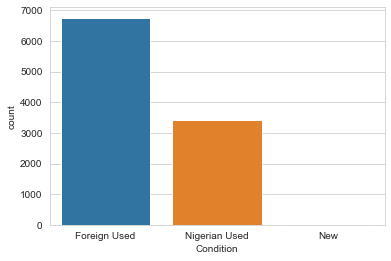

In [125]:
#A countplot showing the graphical representaion of the frequency of all car conditions
sns.countplot(x="Condition", data=df)

In [126]:
# mean mileage, year and price of al conditions of car
df.groupby(['Condition']).mean()

,Mileage,Year,Price
Condition,,,
Foreign Used,138689.430369,2010.919047,8.113017e+06
New,37340.833333,2015.833333,2.210975e+07
Nigerian Used,149055.625110,2007.253731,4.778226e+06


[(1990.0, 2021.0)]

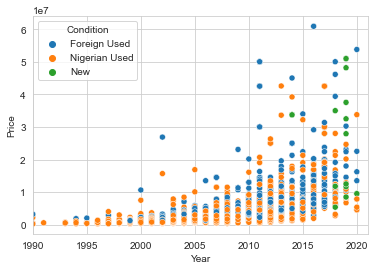

In [127]:
# Graphical representation of price distribution as respect to the model
sns.set_style("whitegrid")
ax = sns.scatterplot(x="Year", y="Price", data=df, hue="Condition")
ax.set(xlim=(1990, 2021))

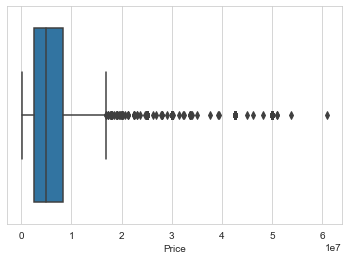

In [128]:
#Box plot showing how the prices in the data are spread out
sns.set_style("whitegrid")
ax = sns.boxplot(x="Price", data=df)

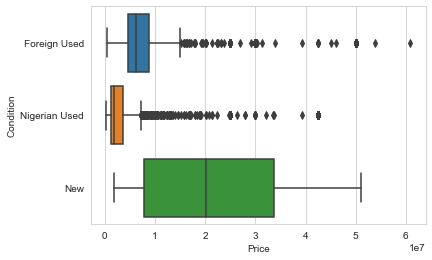

In [132]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Price", y="Condition", data=df)

In [133]:
#drop cars prices above 16 million,
#df2= cars_df.drop(cars_df[cars_df['Price'] > 16000000].index)

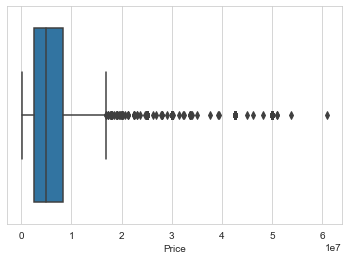

In [134]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Price", data=df)

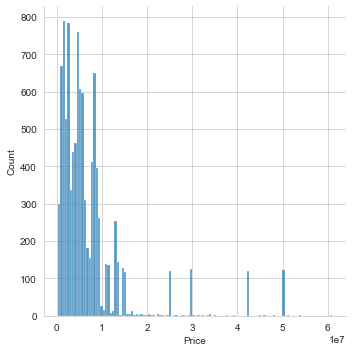

In [135]:
sns.set_style("whitegrid")
ax = sns.displot(x="Price", data=df)